# Airline Customer Satisfaction

Muh Amri Sidiq

## Introduction

In the modern airline industry, understanding customer satisfaction is critical for maintaining brand loyalty and improving service quality. This project explores key factors that influence passenger satisfaction using real-world data from airline customer surveys. Through data cleaning, exploratory data analysis (EDA), feature engineering, and machine learning models, this analysis aims to uncover patterns in customer feedback and predict overall satisfaction levels.

Key areas of focus include flight experience, service quality, delays, seating comfort, and onboard entertainment. The insights from this project can help airlines identify pain points and enhance the customer journey from booking to arrival.



## Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

## Import Data and Read Data

this project import data from **`Kaggle`**, and use pandas tu read data

In [107]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sjleshrac/airlines-customer-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-customer-satisfaction


In [108]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'Invistico_Airline.csv')

airline = pd.read_csv(file_path)

Invistico_Airline.csv


Cek preview data use `.head()`

In [109]:
airline.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [110]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Data have 129880 row and 22 column, next step check missing values

In [111]:
# Check for missing values in each column
missing_values = airline.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (airline.isnull().sum() / len(airline)) * 100

# Print the percentage of missing values for each column
missing_percentage


satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


,0
satisfaction,0.000000
Gender,0.000000
Customer Type,0.000000
Age,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000000
Seat comfort,0.000000
Departure/Arrival time convenient,0.000000
Food and drink,0.000000


above data have missing value in `Arrival Delay in Minutes` 393 row or 0.3% from all data, use only no have missing values

In [112]:
# Delete rows with any missing values
airline = airline.dropna()

## Exploratory Data Analysis

In this project, Exploratory Data Analysis (EDA) plays a key role in understanding the behavior and preferences of airline passengers. By examining the dataset through visualizations and summary statistics, we can uncover important patterns—such as how in-flight service, seat comfort, flight delays, or check-in experiences influence overall customer satisfaction

In [113]:
airline.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Check duplicated data

In [114]:
# Check for duplicated rows
duplicated_rows = airline[airline.duplicated()]

# Print the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

# Number of duplicated rows
num_duplicates = len(duplicated_rows)
print(f"\nNumber of duplicated rows: {num_duplicates}")

# Remove duplicated rows if any
if num_duplicates > 0:
    airline.drop_duplicates(inplace=True)
    print("\nDuplicated rows removed.")

# Verify that duplicates have been removed
print("\nNumber of duplicated rows after removal:")
print(len(airline[airline.duplicated()]))


Duplicated Rows:
Empty DataFrame
Columns: [satisfaction, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes]
Index: []

[0 rows x 23 columns]

Number of duplicated rows: 0

Number of duplicated rows after removal:
0


No have duplicated data, next step check correlation data

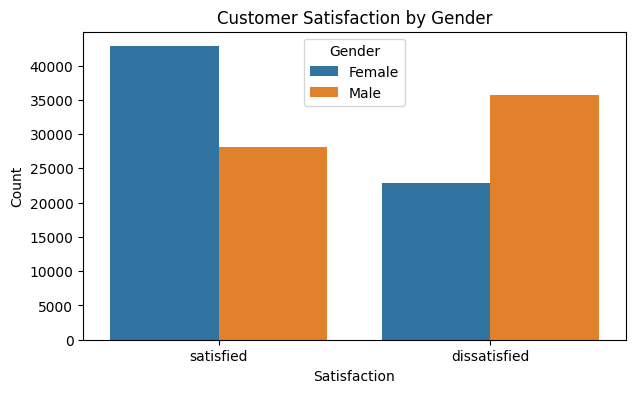

In [139]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Gender', data=airline)
plt.title('Customer Satisfaction by Gender')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Gender` female, `satisfaction` type dissatisfied have higher `Gender` Male

Text(0, 0.5, 'Count')

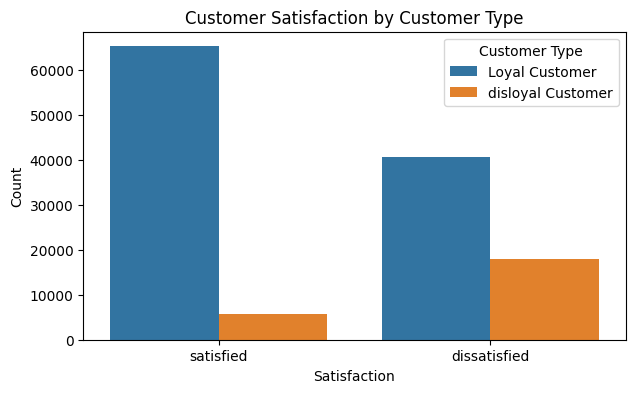

In [140]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Customer Type', data=airline)
plt.title('Customer Satisfaction by Customer Type')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

Insight: `satisfaction` type satisfied have higher `Customer Type` type Loyal Customer, `satisfaction` type dissatisfied have higher `Customer Type` type disloyal Customer

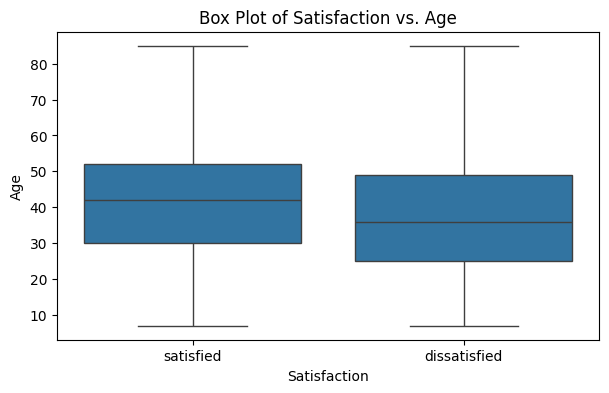

In [141]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='satisfaction', y='Age', data=airline)
plt.title('Box Plot of Satisfaction vs. Age')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


Insight: `satisfaction` type satisfied have higher median and upper qurtile `age`

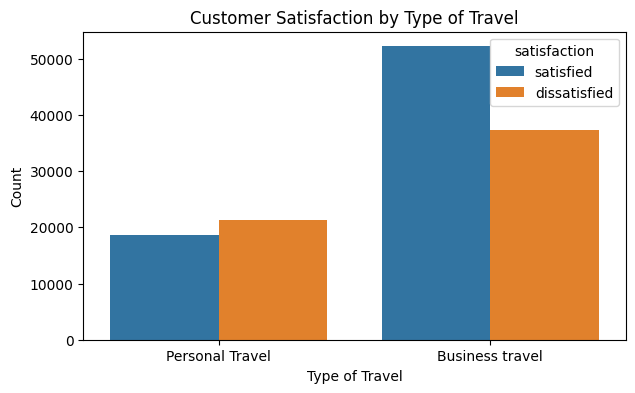

In [142]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Type of Travel', hue='satisfaction', data=airline)
plt.title('Customer Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()


Insight: `Type of Travel` type Personal Travel have higher `satisfaction` dissatisied, and `Type of Travel` type Business Travel have higher `satisfaction` satisified

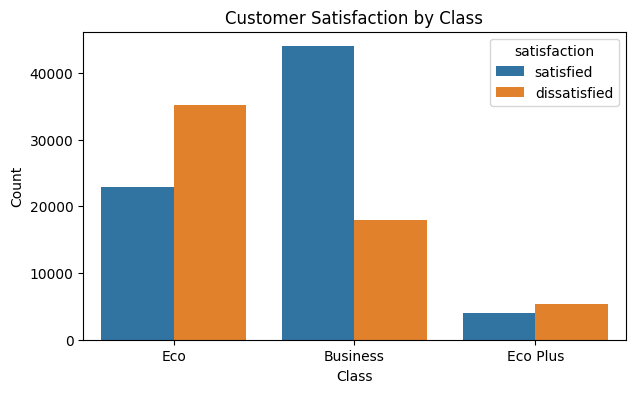

In [143]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Class', hue='satisfaction', data=airline)
plt.title('Customer Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Insight: `Class` type Eco and Eco Plus have higher `satisfaction` type dissatisfied, only in `Class` type Business have higher `satisfaction` type satisfied

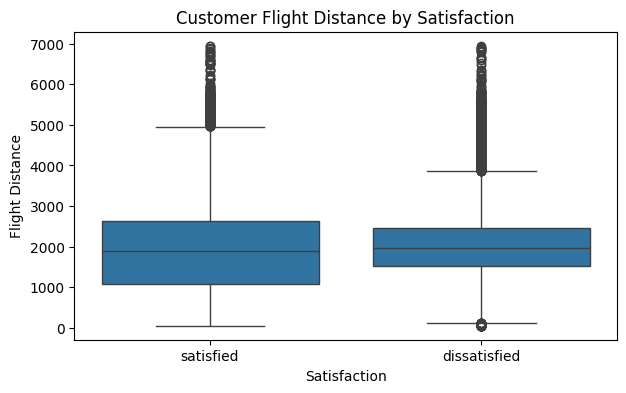

In [144]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='satisfaction', y='Flight Distance', data=airline)
plt.title('Customer Flight Distance by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.show()

Insight: `satisfaction` type satisfied have higher mean and upper quirtile `Flight Distance` than other

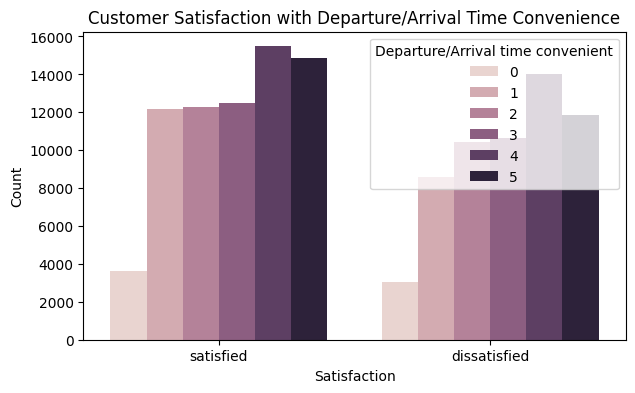

In [145]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Departure/Arrival time convenient', data=airline)
plt.title('Customer Satisfaction with Departure/Arrival Time Convenience')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction`type satisfied have higher `Departure/Arrival Time Convenience` type 4, `satisfaction`type dissatisfied have higher `Departure/Arrival Time Convenience` type 4

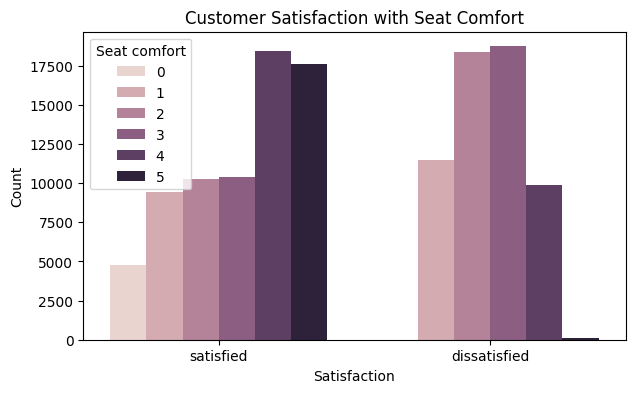

In [146]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Seat comfort', data=airline)
plt.title('Customer Satisfaction with Seat Comfort')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Seat Comfort` type 4 and lowest type 1, `satisfaction` type dissatisfied have higher `Seat Comfort` type 3 and lowest type 5

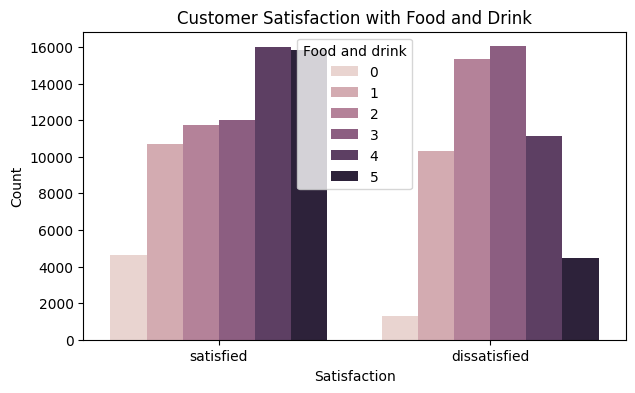

In [147]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Food and drink', data=airline)
plt.title('Customer Satisfaction with Food and Drink')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Food And Drink` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Food And Drink` type 3, and lowest type 1

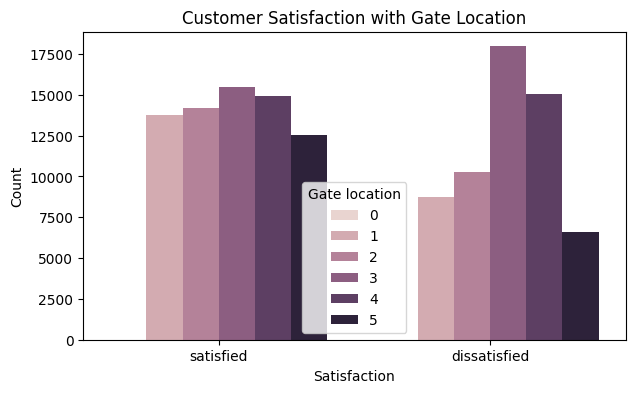

In [148]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Gate location', data=airline)
plt.title('Customer Satisfaction with Gate Location')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Gate Location` type 3, and lowest type 5, `satisfaction` type dissatisfied have higher `Gate Location` type 3, and lowest type 5

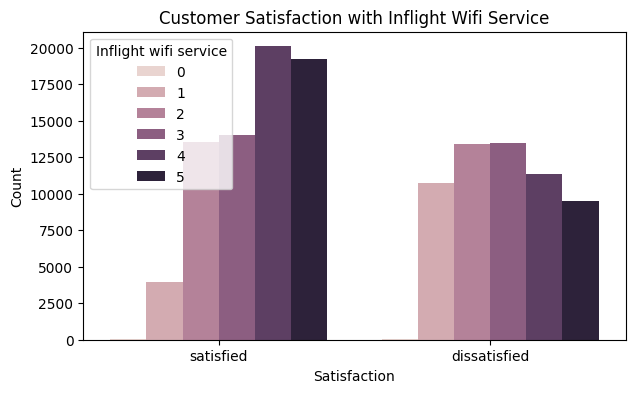

In [149]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Inflight wifi service', data=airline)
plt.title('Customer Satisfaction with Inflight Wifi Service')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Inflight Wifi Service` type 3, and lowest type 1, `satisfaction` type dissatisfied have higher `Inflight Wifi Service` type 3, and lowest type 5

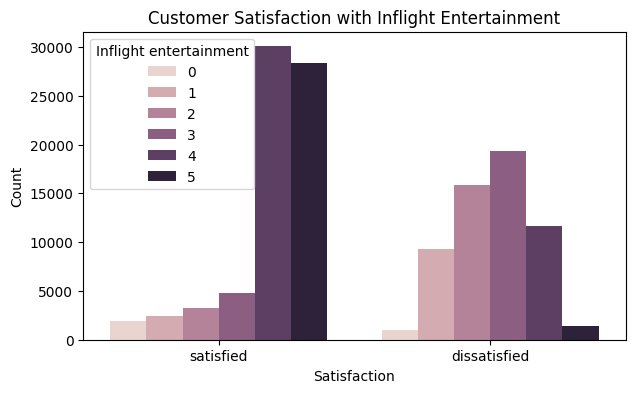

In [150]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Inflight entertainment', data=airline)
plt.title('Customer Satisfaction with Inflight Entertainment')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Inflight Entertainment` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Inflight Entertainment` type 3, and lowest type 5

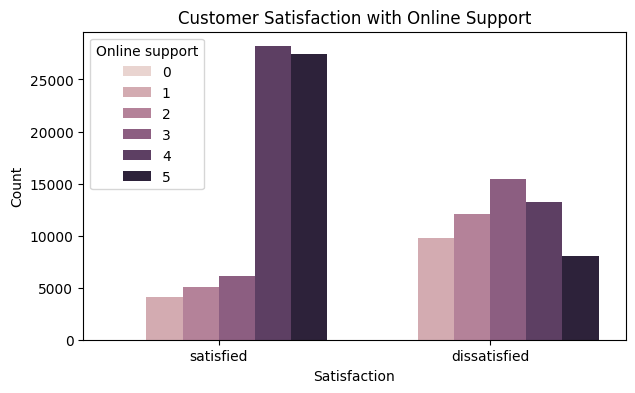

In [151]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Online support', data=airline)
plt.title('Customer Satisfaction with Online Support')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Online Support` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Online Support` type 3, and lowest type 5

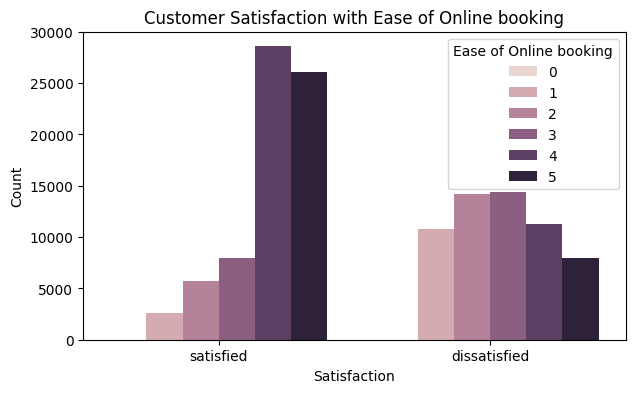

In [152]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Ease of Online booking', data=airline)
plt.title('Customer Satisfaction with Ease of Online booking')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Ease of Online Booking` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Ease of Online Booking` type 3, and lowest type 5

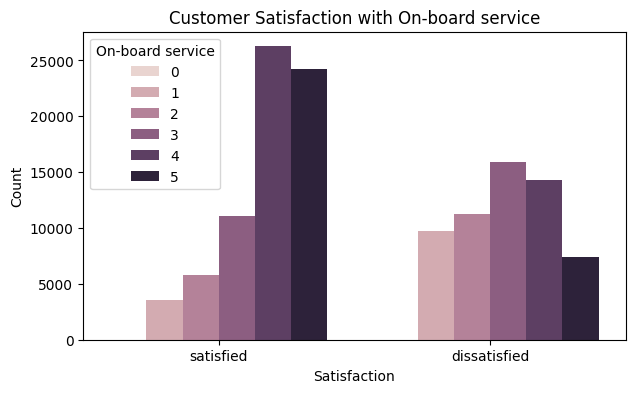

In [153]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='On-board service', data=airline)
plt.title('Customer Satisfaction with On-board service')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `On-Board Service` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `On-Board Service` type 3, and lowest type 5

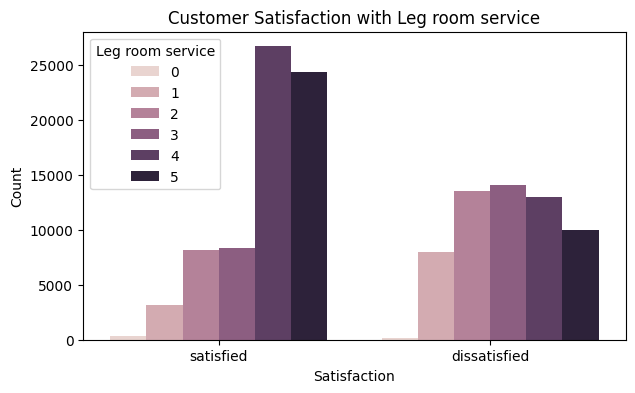

In [154]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Leg room service', data=airline)
plt.title('Customer Satisfaction with Leg room service')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Leg room service` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Leg room service` type 3, and lowest type 1

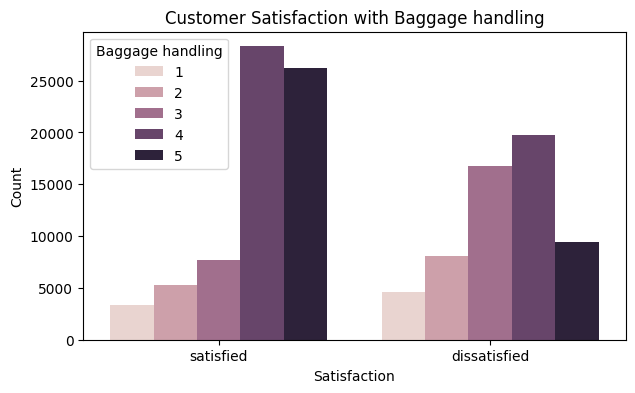

In [155]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Baggage handling', data=airline)
plt.title('Customer Satisfaction with Baggage handling')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Baggage Handling` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Baggage Handling` type 3, and lowest type 1

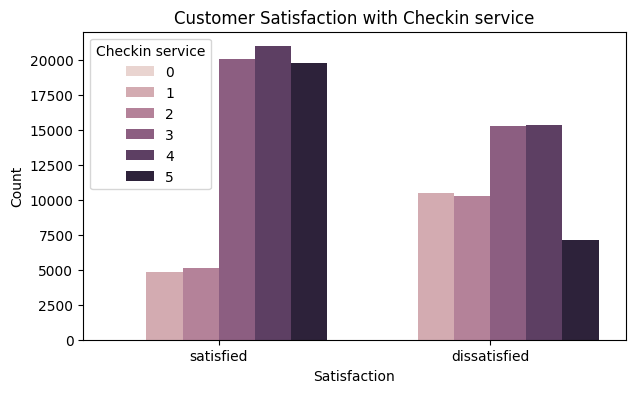

In [156]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Checkin service', data=airline)
plt.title('Customer Satisfaction with Checkin service')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Checkin service` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Checkin service` type 4, and lowest type 5

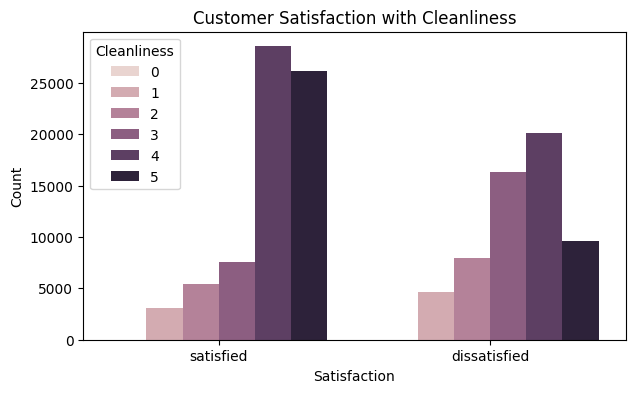

In [157]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Cleanliness', data=airline)
plt.title('Customer Satisfaction with Cleanliness')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Cleanliness` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Cleanliness` type 4, and lowest type 1

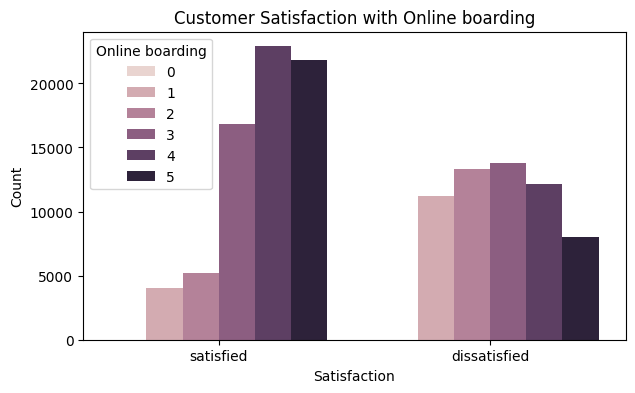

In [158]:
plt.figure(figsize=(7, 4))
sns.countplot(x='satisfaction', hue='Online boarding', data=airline)
plt.title('Customer Satisfaction with Online boarding')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Insight: `satisfaction` type satisfied have higher `Online boarding` type 4, and lowest type 1, `satisfaction` type dissatisfied have higher `Online boarding` type 3, and lowest type 5

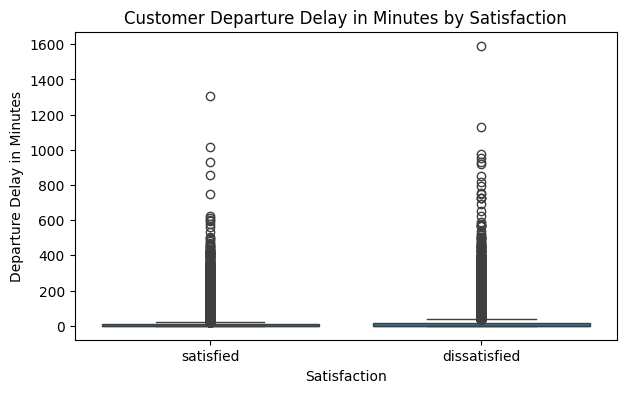

In [159]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=airline)
plt.title('Customer Departure Delay in Minutes by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Departure Delay in Minutes')
plt.show()

Insight: `satisfaction` type dissatisfied have higher outliers and median `Departure Delay in Minutes`

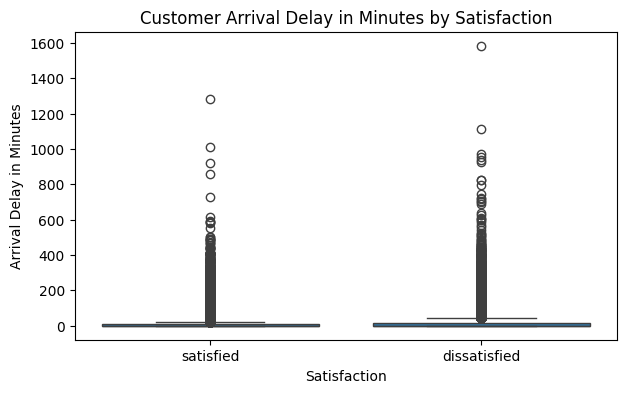

In [160]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=airline)
plt.title('Customer Arrival Delay in Minutes by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Arrival Delay in Minutes')
plt.show()

Insight: `satisfaction` type dissatisfied have higher outliers and median `Arrival Delay in Minutes`

## Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. In the context of this airline customer satisfaction project, feature engineering was used to prepare and enrich the dataset to improve prediction accuracy

### Label Encoding

Encoding categorical variables: Columns such as Customer Type, Type of Travel, and Class were converted into numerical values using techniques like label encoding or one-hot encoding, making them usable by machine learning algorithms

In [161]:
cat_cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Gender']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    airline[col] = le.fit_transform(airline[col])
    label_encoders[col] = le

### Create New Feature

We could generate new features

In [162]:
airline['Total_Delay'] = airline['Departure Delay in Minutes'] + airline['Arrival Delay in Minutes']
airline['ratio_total_delay_distance'] = airline['Total_Delay'] / airline['Flight Distance']

In [163]:
service_features = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
    'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

airline['Average_Service_Rating'] = airline[service_features].mean(axis=1)

### Scalling

To ensure all numerical variables like Age, Flight Distance, and delays are on a similar scale, we applied normalization or standardization techniques

In [164]:
scaler = StandardScaler()
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes',
            'Arrival Delay in Minutes', 'Total_Delay', 'Average_Service_Rating']

airline[num_cols] = scaler.fit_transform(airline[num_cols])

## K-Fold Cross Validation

K-Fold Cross-Validation splits the dataset into multiple folds, training the model on different subsets and testing on unseen data. This technique minimizes overfitting and provides a comprehensive evaluation of model performance. By leveraging Python’s scikit-learn, we ensure that our model is both robust and generalizes well to new data

In [165]:
x = airline.drop(columns='satisfaction')
y = airline['satisfaction']

In [166]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(x):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

## Modeling

In this phase, we develop and fine-tune machine learning models using powerful algorithms like XGBoost. With Python’s Xgboost, we train models, optimize hyperparameters, and evaluate their performance. The goal: a model that balances accuracy, precision, and recall to deliver actionable insights

In [167]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Feature Importance

Understanding which features impact predictions the most is crucial for both model optimization and business insights. Using Python libraries like scikit-learn we visualize feature importance. This step highlights the variables that matter most, providing transparency and guiding data-driven decisions

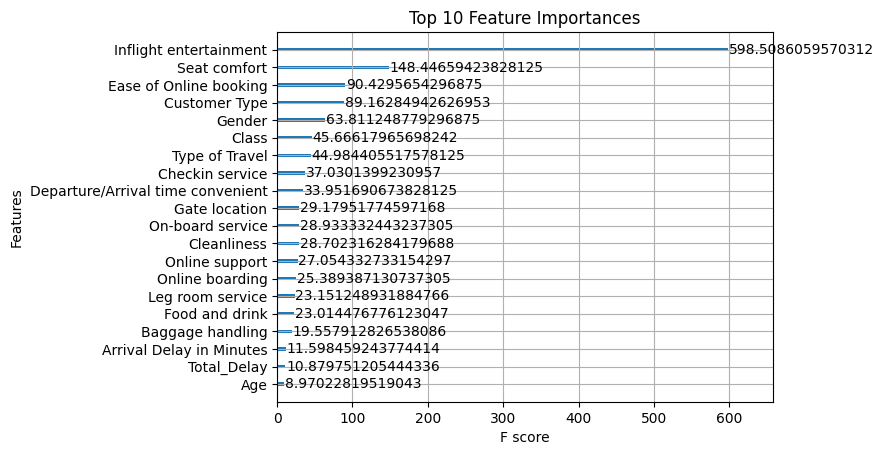

In [168]:
xgb.plot_importance(xgb_clf, max_num_features=20, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()

Insight: `Inflight entertainment` have highest F Score/ have highest feature importance

## Prediction and Evaluation

✅ Accuracy: 0.9560

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11652
           1       0.97      0.95      0.96     14245

    accuracy                           0.96     25897
   macro avg       0.95      0.96      0.96     25897
weighted avg       0.96      0.96      0.96     25897

🧱 Confusion Matrix:


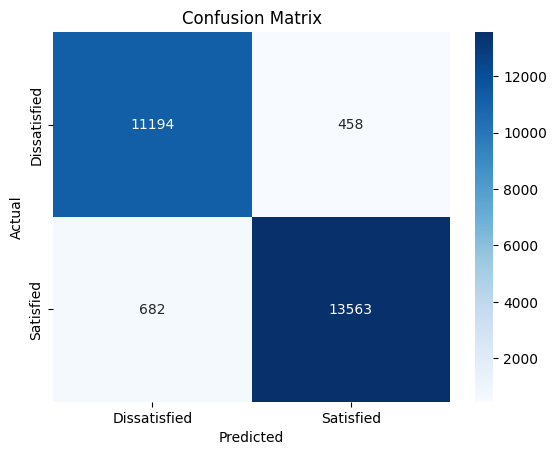

In [169]:
y_pred = xgb_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'✅ Accuracy: {accuracy:.4f}\n')

print('📊 Classification Report:')
print(classification_report(y_test, y_pred))

print('🧱 Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Insight:

 - True Negative (TN) = 11.194 → Model correctly predicts dissatisfied customers
 - False Positive (FP) = 458 → The model incorrectly predicts a dissatisfied customer as satisfied
 - False Negative (FN) = 682 → The model incorrectly predicts a satisfied customer as dissatisfied
 - True Positive (TP) = 13,563 → The model correctly predicts satisfied customers


## Conclusion

This project aimed to develop a predictive model for airline customer satisfaction by leveraging machine learning techniques, specifically using the XGBoost algorithm. Through comprehensive steps including data cleaning, exploratory data analysis (EDA), feature engineering, and model evaluation using stratified K-Fold cross-validation, the model demonstrated strong and consistent performance.

The final model achieved an overall accuracy of 95%, with an F1-score of 0.96 for satisfied customers and 0.95 for dissatisfied customers. These results indicate a high level of predictive capability and robustness, as also reflected in the confusion matrix which shows minimal misclassification rates.

The insights derived from this model can assist airline companies in identifying key service areas that influence customer satisfaction, such as in-flight services, punctuality, and digital support. By leveraging such a model, organizations can make data-driven decisions to enhance customer experience, optimize operations, and ultimately improve retention.

For future development, further optimization could include hyperparameter tuning, integration with live customer feedback systems, and model deployment into interactive dashboards or web-based applications

## Reference

1. https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction
2. https://xbe.at/
3. https://scikit-learn.org/stable/supervised_learning.html
4. https://www.analyticsvidhya.com/